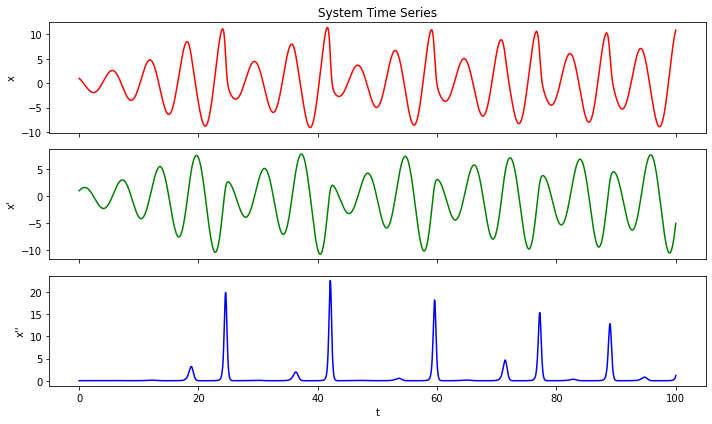

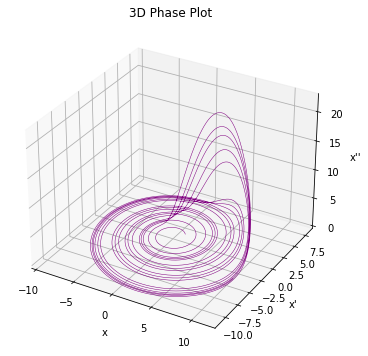

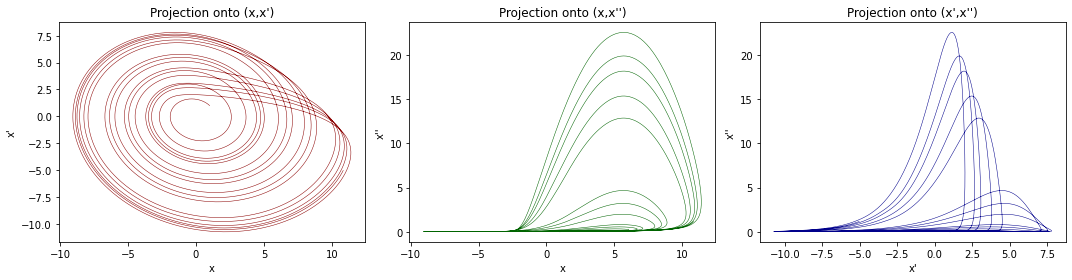

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define Rossler system
def f(t, state, a=0.2, b=0.2, c=5.7):
    x, y, z = state
    dxdt = -y - z
    dydt = x + a*y
    dzdt = b + z*(x - c)
    return [dxdt, dydt, dzdt]

# Initial condition
state0 = [1.0, 1.0, 0.0]

# Time span
t_span = (0, 100)
t_eval = np.linspace(*t_span, 20000)

# Solve system
sol = solve_ivp(f, t_span, state0, t_eval=t_eval)

x, y, z = sol.y
t = sol.t

# --- Time series plots ---
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
axs[0].plot(t, x, color="red")
axs[0].set_ylabel("x")
axs[0].set_title("System Time Series")

axs[1].plot(t, y, color="green")
axs[1].set_ylabel("x'")

axs[2].plot(t, z, color="blue")
axs[2].set_ylabel("x''")
axs[2].set_xlabel("t")

plt.tight_layout()
plt.show()

# --- 3D Phase plot ---
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.plot(x, y, z, lw=0.5, color="purple")

ax.set_xlabel("x")
ax.set_ylabel("x'")
ax.set_zlabel("x''")
ax.set_title("3D Phase Plot")
plt.show()

# --- 2D Projections ---
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(x, y, color="darkred", lw=0.5)
axs[0].set_xlabel("x")
axs[0].set_ylabel("x'")
axs[0].set_title("Projection onto (x,x')")

axs[1].plot(x, z, color="darkgreen", lw=0.5)
axs[1].set_xlabel("x")
axs[1].set_ylabel("x''")
axs[1].set_title("Projection onto (x,x'')")

axs[2].plot(y, z, color="darkblue", lw=0.5)
axs[2].set_xlabel("x'")
axs[2].set_ylabel("x''")
axs[2].set_title("Projection onto (x',x'')")

plt.tight_layout()
plt.show()
